# PLM PROJECT - ALE Environment - Pacman

<div class="alert alert-block alert-info">

Martina Carretta || NIU: 1673930

Mariona Pla || NIU: 1616474
</div>


Before training the agent to play the Skiing game, it is essential to conduct an initial analysis to establish a baseline. This involves observing the performance of an untrained agent to understand how it interacts with the environment and the rewards it receives.

Recording gameplay as GIFs is valuable, as it allows for visual inspection of how the random agent moves. This provides a useful reference point for later comparing the agent's behavior after training, helping to highlight the improvements in its movements over time.

In [ ]:
import gymnasium as gym
import numpy as np
import torch
from PIL import Image
import ale_py
import matplotlib.pyplot as plt

from stable_baselines3.common.env_util import make_atari_env

import os
import cv2


# Environment analysis

### 'Normal' environment creation

In [40]:
env = gym.make("ALE/Pacman-v5", render_mode="rgb_array")  # render mode to allow GIF recording

print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Box(0, 255, (250, 160, 3), uint8) 


In [ ]:
print(env.spec.reward_threshold)

There is no reward threshold, so we cannot use it to know when the agent has learnt to play. 

### Atari specific environment creation

In [ ]:
env_id  = "ALE/Pacman-v5"
env_atari = make_atari_env(env_id, n_envs=1, seed=0)  # Single environment for testing
print("Action space is {} ".format(env.action_space))
print("Observation space is {} ".format(env.observation_space))

Action space is Discrete(5) 
Observation space is Box(0, 255, (250, 160, 3), uint8) 


**Actions**:
- 0: NOOP
- 1: UP
- 2: RIGHT
- 3: LEFT
- 4: DOWN

**Observation space**:
- Array with shape (210, 160, 3) where each element is an integer between 0 and 255

________________________

### Episode reward analysis

After running multiple sets of 100 episodes, it can be observed that Pacman's episode rewards typically fall within the range of 10 to 30. However, occasional episodes exceed this range, achieving rewards between 60 and 100.

In [ ]:
def watch_untrained_agent(env):
    gif_folder = "videos_untrained_agent"
    os.makedirs(gif_folder, exist_ok=True)

    episode_rewards = []
    for episode in range(200):
        state, _ = env.reset()
        rewards = []
        images = []

        for t in range(2000):
            # Randomly select an action (untrained agent)
            action = env.action_space.sample()

            # Render the environment and save the frame
            img = env.render()
            images.append(Image.fromarray(img))

            # Execute action and get reward and new state
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            rewards.append(reward)

            if done:
                # Add the total reward of this episode to the list
                episode_rewards.append(sum(rewards))

                # Save a GIF if the episode is a multiple of 10
                if (episode + 1) % 10 == 0:
                    gif_filename = os.path.join(gif_folder, f"untrained_agent_episode_{episode + 1}.gif")
                    images[0].save(
                        gif_filename,
                        save_all=True,
                        append_images=images[1:],
                        duration=60,
                        loop=0,
                    )
                    print(f"Saved GIF for Episode {episode + 1} as {gif_filename}")
                break

    return episode_rewards

Saved GIF for Episode 10 as videos_untrained_agent\untrained_agent_episode_10.gif
Saved GIF for Episode 20 as videos_untrained_agent\untrained_agent_episode_20.gif
Saved GIF for Episode 30 as videos_untrained_agent\untrained_agent_episode_30.gif
Saved GIF for Episode 40 as videos_untrained_agent\untrained_agent_episode_40.gif
Saved GIF for Episode 50 as videos_untrained_agent\untrained_agent_episode_50.gif
Saved GIF for Episode 60 as videos_untrained_agent\untrained_agent_episode_60.gif
Saved GIF for Episode 70 as videos_untrained_agent\untrained_agent_episode_70.gif
Saved GIF for Episode 80 as videos_untrained_agent\untrained_agent_episode_80.gif
Saved GIF for Episode 90 as videos_untrained_agent\untrained_agent_episode_90.gif
Saved GIF for Episode 100 as videos_untrained_agent\untrained_agent_episode_100.gif
Saved GIF for Episode 110 as videos_untrained_agent\untrained_agent_episode_110.gif
Saved GIF for Episode 120 as videos_untrained_agent\untrained_agent_episode_120.gif
Saved GIF 

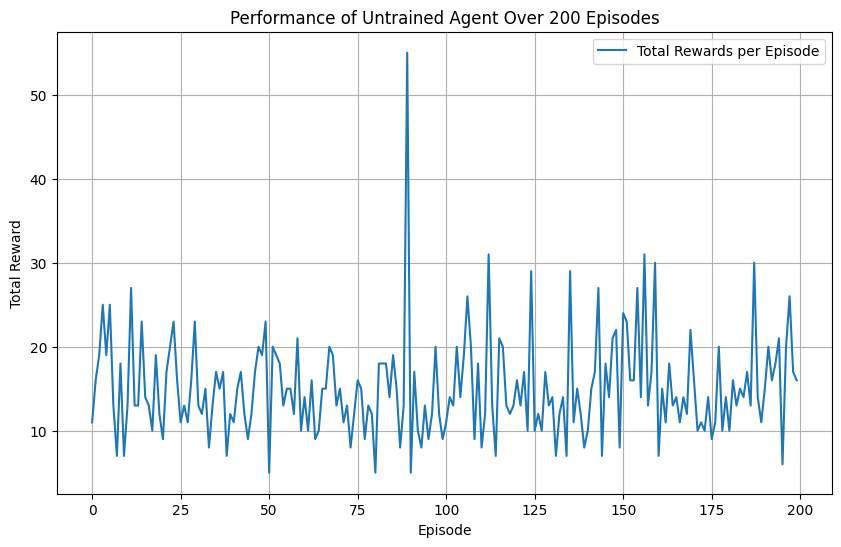

In [45]:
# Watch the agent and collect episode rewards
episode_rewards = watch_untrained_agent(env)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Total Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Performance of Untrained Agent Over 200 Episodes")
plt.legend()
plt.grid(True)
plt.show()


____________

## Action rewards analsysis

After multiple episodes, Pacman's rewards are observed to be 0, 1, and 2. Each episode typically includes numerous rewards of 0, a few rewards of 1, and occasionally, a single reward of 2.

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

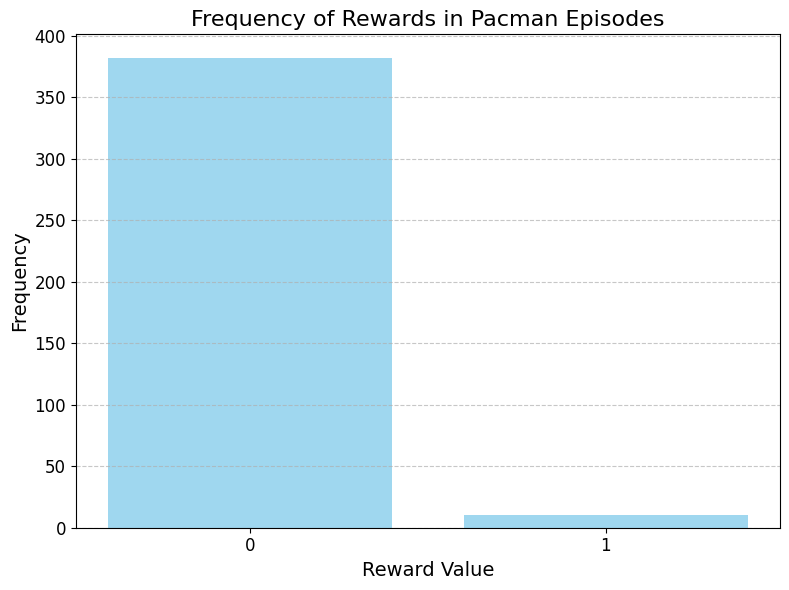

In [136]:
def play_episode(env):
    # Reset the environment for the episode
    state, _ = env.reset()
    rewards = []
    images = []

    # Maximum time steps for the episode
    for t in range(2000):
        # Randomly select an action (untrained agent)
        action = env.action_space.sample()

        # Execute action and get reward and new state
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        rewards.append(reward)

        if done:
            break
    
    return rewards

# Watch the agent and collect rewards for the episode
rewards = play_episode(env)
print(rewards)

# Calculate and display statistics
min_reward = np.min(rewards)
mean_reward = np.mean(rewards)
max_reward = np.max(rewards)
sum_reward = np.sum(rewards)
unique_rewards = sorted(set(rewards))


# Display the statistics
print("\nStatistics:")
print(f"Minimum Reward: {min_reward}")
print(f"Mean Reward: {mean_reward}")
print(f"Maximum Reward: {max_reward}")
print(f"Episode Reward: {sum_reward}")


# Display sorted unique rewards
print(f"Unique Rewards: {unique_rewards}")


unique_rewards, counts = np.unique(rewards, return_counts=True)

# Plotting the frequency of rewards
plt.figure(figsize=(8, 6))
plt.bar(unique_rewards, counts, color='skyblue', alpha=0.8)
plt.xlabel('Reward Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Rewards in Pacman Episodes', fontsize=16)
plt.xticks(unique_rewards, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()
